Assignment 1

In [1]:
import pandas as pd
import statsmodels.formula.api as sm 

url = "https://raw.githubusercontent.com/Patrick0481/Intro-to-modeling/refs/heads/main/1654308boston.csv"
BostonData = pd.read_csv(url)
#print(BostonData.head()) 


model1 = sm.ols('MEDV ~ AGE + RM', data=BostonData).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     235.3
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           9.12e-71
Time:                        13:00:44   Log-Likelihood:                -2855.2
No. Observations:                 455   AIC:                             5716.
Df Residuals:                     452   BIC:                             5729.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -482.1251     61.961     -7.781      0.0

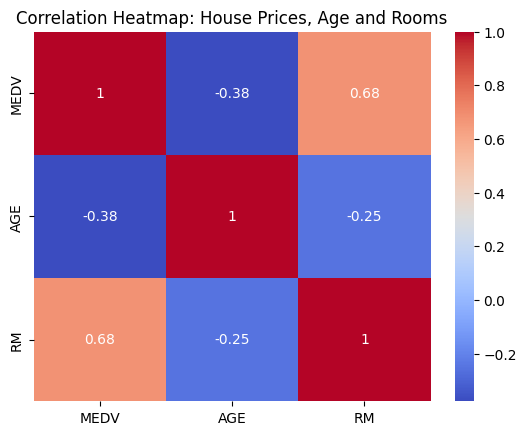

In [2]:
#Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

Collums = ['MEDV', 'AGE', 'RM'] 
CorrelationMatrix = BostonData[Collums].corr()

sns.heatmap(CorrelationMatrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: House Prices, Age and Rooms')
plt.show()

In [3]:
model2 = sm.ols('MEDV ~ AGE + RM + CRIM + INDUS + NOX + DIS + RAD + TAX + PTRATIO + LANDMARK', data=BostonData).fit()
print(model2.summary())

#When runnin this code it give a note saying that the condition number is large, 1e+18. This might indicate that there is
#strong multicollinearity


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     261.5
Date:                Fri, 07 Nov 2025   Prob (F-statistic):          8.50e-198
Time:                        13:00:59   Log-Likelihood:                -2525.2
No. Observations:                 455   AIC:                             5078.
Df Residuals:                     441   BIC:                             5136.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [4]:
# Create a copy of the data without the target variable
X = BostonData.drop(columns=['MEDV'])

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['CHAS', 'LANDMARK'], drop_first=True)

# Convert boolean columns to int
X = X.astype(float)



In [5]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

# Center and scale predictors
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Add constant AFTER scaling
X_scaled_const = sm.add_constant(X_scaled)

# Compute new VIFs
VIF_data_scaled = pd.DataFrame()
VIF_data_scaled["Variable"] = X_scaled_const.columns
VIF_data_scaled["VIF"] = [variance_inflation_factor(X_scaled_const.values, i)
                          for i in range(X_scaled_const.shape[1])]
print(VIF_data_scaled)

                  Variable        VIF
0                    const   1.000000
1                     CRIM   1.665426
2                    INDUS   4.041542
3                      NOX   4.321557
4                       RM   1.934983
5                      AGE   2.812461
6                      DIS   3.536924
7                      RAD   7.307008
8                      TAX   8.549576
9                  PTRATIO   1.795496
10                CHAS_yes   1.095050
11    LANDMARK_No Landmark  11.324397
12           LANDMARK_Park   5.759003
13  LANDMARK_Shopping Mall   5.645789
14        LANDMARK_Stadium   1.828077


In [6]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1️⃣ Prepare predictors and target
y = BostonData['MEDV']
X = BostonData.drop(columns=['MEDV'])

# Convert categorical variables to dummies
X = pd.get_dummies(X, columns=['CHAS', 'LANDMARK'], drop_first=True)
X = X.astype(float)

# Standardize predictors
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Add constant
X_scaled_const = sm.add_constant(X_scaled)

# 2️⃣ Fit the multiple regression model
model = sm.OLS(y, X_scaled_const).fit()

# 3️⃣ Create APA-style table
apa_table = pd.DataFrame({
    "Predictor": X_scaled_const.columns,
    "B": model.params.values,
    "SE B": model.bse.values,
    "t": model.tvalues.values,
    "p": model.pvalues.values
}).round(3)

# Add significance stars
def stars(p):
    if p < 0.001: return "***"
    elif p < 0.01: return "**"
    elif p < 0.05: return "*"
    else: return ""
apa_table["Sig"] = apa_table["p"].apply(stars)

# Add 95% confidence intervals
conf = model.conf_int().round(3)
conf.columns = ["95% CI Lower", "95% CI Upper"]
# Ensure the confidence intervals are aligned with the apa_table predictor order
conf = conf.reindex(apa_table["Predictor"])
apa_table["95% CI Lower"] = conf["95% CI Lower"].values
apa_table["95% CI Upper"] = conf["95% CI Upper"].values

# Compute VIFs
vif_data = pd.DataFrame({
    "Predictor": X_scaled_const.columns,
    "VIF": [variance_inflation_factor(X_scaled_const.values, i) for i in range(X_scaled_const.shape[1])]
})
apa_table = apa_table.merge(vif_data, on="Predictor")

# 4️⃣ Display clean APA table
print("\nAPA-Style Multiple Regression Table:")
print(apa_table.to_string(index=False))


APA-Style Multiple Regression Table:
             Predictor        B  SE B       t     p Sig  95% CI Lower  95% CI Upper       VIF
                 const  450.035 2.956 152.235 0.000 ***       444.225       455.845  1.000000
                  CRIM  -30.428 3.815  -7.976 0.000 ***       -37.926       -22.930  1.665426
                 INDUS    4.698 5.943   0.791 0.430            -6.982        16.378  4.041542
                   NOX  -28.283 6.145  -4.602 0.000 ***       -40.361       -16.205  4.321557
                    RM   20.745 4.112   5.045 0.000 ***        12.663        28.827  1.934983
                   AGE  -18.637 4.958  -3.759 0.000 ***       -28.380        -8.893  2.812461
                   DIS  -17.577 5.560  -3.162 0.002  **       -28.504        -6.651  3.536924
                   RAD   21.125 7.991   2.644 0.008  **         5.420        36.830  7.307008
                   TAX  -29.474 8.644  -3.410 0.001  **       -46.462       -12.485  8.549576
               PTRATIO